# Lasso Random CV Initial

## Preprocess Data

In [11]:
import numpy as np
import pandas as pd

import sys
import os
sys.path.append(os.path.abspath('../'))

from Models.LinearRegression import LinearRegression
from Utils.Preprocessor import Preprocessor
from Utils.Utils import root_mean_squared_error, train_test_split, initial_preprocessing, feature_elimination
from Utils.CrossValidation import KFoldCrossValidation
from Utils.Pipeline import Pipeline

In [12]:
# Read the data
train = pd.read_csv('../Data/train.csv', index_col='Id')
# Remove unnecessary features based on exploratory data analysis part 1.
train = initial_preprocessing(train)
train = feature_elimination(train)
X = train.drop(columns=["num_wins_agent1", "num_draws_agent1", "num_losses_agent1", "utility_agent1"], axis=1)
y = train["utility_agent1"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
# clip the dataset
X_train = X_train[0:50000]
y_train = y_train[0:50000]

## Randomized CV

In [15]:
# Randomized Cross Validation
num_folds = 5
num_iterations = 20
l2_range = np.logspace(-4, -1, 10)
results = []

for i in range(num_iterations):
    l2 = np.random.choice(l2_range)

    pipeline = Pipeline(Preprocessor(normalize=True, standardize=False, one_hot_encode=True), LinearRegression(fit_method="ols", loss_function="rmse", l2=l2))
    print(f"Iteration {i+1} / {num_iterations} l2: {l2:.6f}")

    cross_val = KFoldCrossValidation(pipeline, X, y, num_folds)
    mean_score = cross_val.mean_score()
    results.append(([l2], mean_score))

    print(f"Finished iteration {i + 1}/{num_iterations}, score: {mean_score:.6f}")
    print()
sorted_results = sorted(results, key=lambda x: x[1])

print("L2 Parameter | Score")
print("-" * 25)
for l1, score in sorted_results:
    print(f"{l1} | {score:.6f}")

best_params, best_score = sorted_results[0]
print(f"\nBest Params: {best_params}")
print(f"Best Score: {best_score:.6f}")

Iteration 1 / 20 l2: 0.021544


Finished iteration 1/20, score: 0.555718

Iteration 2 / 20 l2: 0.021544
Finished iteration 2/20, score: 0.555718

Iteration 3 / 20 l2: 0.002154
Finished iteration 3/20, score: 0.555715

Iteration 4 / 20 l2: 0.000464
Finished iteration 4/20, score: 0.555710

Iteration 5 / 20 l2: 0.100000
Finished iteration 5/20, score: 0.555729

Iteration 6 / 20 l2: 0.100000
Finished iteration 6/20, score: 0.555729

Iteration 7 / 20 l2: 0.000100
Finished iteration 7/20, score: 0.555695

Iteration 8 / 20 l2: 0.002154
Finished iteration 8/20, score: 0.555715

Iteration 9 / 20 l2: 0.021544
Finished iteration 9/20, score: 0.555718

Iteration 10 / 20 l2: 0.004642
Finished iteration 10/20, score: 0.555716

Iteration 11 / 20 l2: 0.100000
Finished iteration 11/20, score: 0.555729

Iteration 12 / 20 l2: 0.000464
Finished iteration 12/20, score: 0.555710

Iteration 13 / 20 l2: 0.046416
Finished iteration 13/20, score: 0.555721

Iteration 14 / 20 l2: 0.000464
Finished iteration 14/20, score: 0.555710

Iteration 15

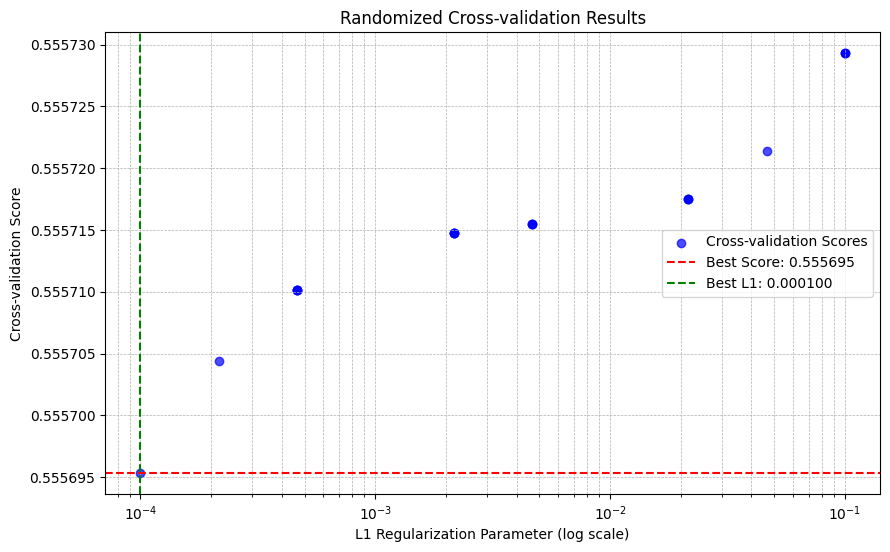

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the L1 parameters and scores from the results
l1_parameters = [result[0] for result in results]
scores = [result[1] for result in results]

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(l1_parameters, scores, color='blue', alpha=0.7, label='Cross-validation Scores')
plt.xscale('log')  # Since L1 values are on a log scale
plt.xlabel('L1 Regularization Parameter (log scale)')
plt.ylabel('Cross-validation Score')
plt.title('Randomized Cross-validation Results')
plt.axhline(y=best_score, color='red', linestyle='--', label=f'Best Score: {best_score:.6f}')
plt.axvline(x=best_l1, color='green', linestyle='--', label=f'Best L1: {best_l1:.6f}')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()